In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
size = 100

a = torch.rand(size=(size, 1)) * 100
b = torch.rand(size=(size, 1)) * 100
c = a + b + torch.rand(size, 1) * 3  # the last item is adding noise


In [4]:
df = pd.DataFrame()
df['a'] = a[:, 0].numpy()
df['b'] = b[:, 0].numpy()
df['c'] = c[:, 0].numpy()


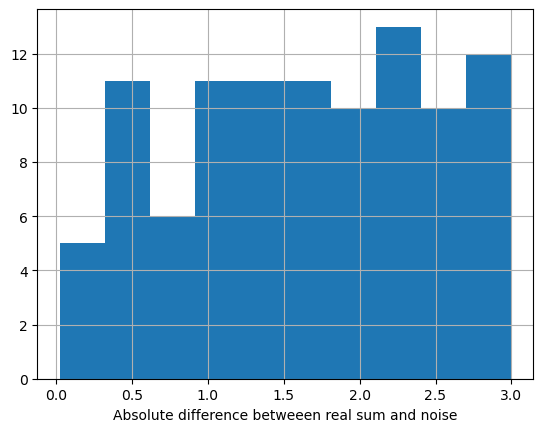

In [5]:
abs(df['c'] - (df['a'] + df['b'])).hist()
plt.xlabel("Absolute difference betweeen real sum and noise")
plt.show()

In [6]:
import torch.nn as nn
import torch.nn.functional as F

input_feat_count = 2
hidden_dim = 0

class SimpleNN(nn.Module):
    def __init__(self, hidden_dim=hidden_dim):
        super(SimpleNN, self).__init__()
        # Input layer: 2 features -> hidden_dim
        # self.fc1 = nn.Linear(input_feat_count, hidden_dim)
        # Hidden layer: hidden_dim -> 1 output
        self.fc2 = nn.Linear(input_feat_count, 1)

    def forward(self, x):
        # Pass through first layer + activation
        # x = F.relu(self.fc1(x))
        # Output layer (no activation, for regression)
        x = self.fc2(x)
        return x


# Example usage:
model = SimpleNN(hidden_dim=hidden_dim)
print(model)


SimpleNN(
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [7]:
tensor = torch.concatenate([a, b], axis=1)
output = model(tensor)
output.shape

torch.Size([100, 1])

In [8]:
diff = abs(output[:, 0] - c[:, 0])

In [9]:
diff

tensor([124.1415,  84.0331,  45.8548,  69.2776, 169.7619, 135.1211,  93.1921,
        150.1939, 217.3164, 109.2421, 161.3676, 153.5149, 152.7236, 172.5754,
        167.5773, 123.7604, 194.7648,  79.8754,  19.8436, 111.1227, 122.1073,
         85.9304,  44.6863,  32.7266,  96.8002, 163.5191, 172.8188,  72.3082,
        179.1526,  81.4423, 105.6120, 115.6913, 165.0507,  53.0157,  49.6144,
         77.1157, 103.3156,  83.6566, 165.7405,  60.3762, 103.6005, 191.7646,
         36.4198, 165.2099,  12.3106,  83.8597,  91.9292, 170.0515,  11.3696,
         65.8094,  67.7838, 117.6104,  71.1962,  61.2452,  49.2415,  92.9903,
        122.2955, 141.3370,  75.7658,  98.6604, 131.9891, 115.3074,  87.9056,
        122.1791,  50.8750, 178.4979, 136.3072,  91.7601,  55.9966, 143.3347,
        136.1593, 110.5955, 203.8277,  56.7615,  81.8665, 149.1928, 120.7347,
         65.4038,  37.5464,  54.0462,  99.9905, 173.9481,  93.3416, 123.0905,
        111.1385,  93.6546,  65.8633,  28.5766,  60.6238, 120.27

In [10]:
import torch.optim as optim

criterion = nn.MSELoss()  # regression loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [14]:
epochs = 200
for epoch in range(epochs):
    # Forward pass
    outputs = model(tensor)
    loss = criterion(outputs, c)
    
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
        for name, param in model.named_parameters():
            print(name, param.data)
            print("\n")

    if loss < 1:
        break
for name, param in model.named_parameters():
    print(name, param.data)


Epoch [20/200], Loss: 249.2432
fc2.weight tensor([[0.5573, 1.3289]])


fc2.bias tensor([1.7069])


Epoch [40/200], Loss: 216.0018
fc2.weight tensor([[0.5913, 1.3132]])


fc2.bias tensor([1.7177])


Epoch [60/200], Loss: 186.6999
fc2.weight tensor([[0.6223, 1.2948]])


fc2.bias tensor([1.7255])


Epoch [80/200], Loss: 160.5482
fc2.weight tensor([[0.6509, 1.2751]])


fc2.bias tensor([1.7315])


Epoch [100/200], Loss: 137.2454
fc2.weight tensor([[0.6779, 1.2550]])


fc2.bias tensor([1.7365])


Epoch [120/200], Loss: 116.6139
fc2.weight tensor([[0.7033, 1.2353]])


fc2.bias tensor([1.7408])


Epoch [140/200], Loss: 98.4876
fc2.weight tensor([[0.7275, 1.2163]])


fc2.bias tensor([1.7446])


Epoch [160/200], Loss: 82.6867
fc2.weight tensor([[0.7504, 1.1980]])


fc2.bias tensor([1.7482])


Epoch [180/200], Loss: 69.0185
fc2.weight tensor([[0.7720, 1.1807]])


fc2.bias tensor([1.7516])


Epoch [200/200], Loss: 57.2834
fc2.weight tensor([[0.7923, 1.1645]])


fc2.bias tensor([1.7547])


fc2.weig

In [28]:
diff = abs(outputs[:, 0] - c[:, 0])
diff

tensor([0.2960, 0.1272, 1.3779, 0.7805, 0.1934, 0.8654, 0.8796, 0.0480, 0.4557,
        0.1018, 1.2670, 1.7204, 1.3130, 1.2274, 0.8659, 1.0393, 1.2973, 1.2226,
        1.2440, 0.8662, 1.1101, 0.0083, 0.0510, 2.1017, 0.7638, 0.8045, 1.6319,
        0.0236, 1.1392, 0.7892, 0.2493, 1.4266, 0.6446, 1.4483, 0.0600, 1.1684,
        0.5811, 0.8642, 0.0043, 0.0474, 0.3249, 1.0675, 1.1911, 1.2235, 0.9838,
        0.6458, 1.1912, 1.0851, 0.0634, 1.0070, 0.3882, 0.2825, 1.1071, 0.4593,
        1.4626, 1.0661, 0.7520, 0.6867, 0.3384, 0.4775, 0.4078, 0.4121, 0.8740,
        1.7247, 0.4533, 0.5642, 1.5769, 0.5871, 0.7457, 0.4030, 0.9080, 0.0146,
        0.9977, 0.7931, 2.0198, 1.6028, 0.6233, 1.3668, 0.1213, 1.6434, 0.2350,
        1.5012, 1.6445, 1.1463, 1.2461, 0.5145, 0.8570, 1.2419, 0.3544, 1.1749,
        1.3322, 0.8756, 0.9245, 1.3015, 0.4797, 1.9002, 1.1524, 0.7800, 0.9887,
        0.6666], grad_fn=<AbsBackward0>)

In [29]:
for name, param in model.named_parameters():
    print(name, param.data)

fc2.weight tensor([[0.9906, 1.0061]])
fc2.bias tensor([1.8527])


In [15]:
print("Weights of first layer:") 
model.fc1.weight.data

SyntaxError: unmatched ')' (3156371448.py, line 1)

In [30]:
print("Bias of first layer:") 
model.fc1.bias.data


Bias of first layer:


tensor([1.8419])

In [31]:
print("Weights of second layer:", model.fc2.weight.data)
print("Bias of second layer:", model.fc2.bias.data)


Weights of second layer: tensor([[1.1055]])
Bias of second layer: tensor([0.5126])


# 

In [15]:
m = nn.Conv1d(in_channels=12, out_channels=1, kernel_size=17, stride=2)

input_ = torch.randn(20, 12, 50)

output = m(input_)


In [21]:
m = nn.Conv1d(16, 33, 5, stride=3)
input_ = torch.randn(20, 16, 50)
output = m(input_)

output.shape

torch.Size([20, 33, 16])

In [18]:
input_.shape

torch.Size([20, 16, 50])